In [57]:
%run func_def.ipynb

imports loaded.

> Pre-Processing func:
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_prob(name, date, df)
    get_win_streak(name, date, df) #return count of recent wins
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )

> Feature Engineering func:
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data) # return fighter & opponent statistics swapped. 
    get_wins(combo, data)
    get_wins_ratio(combo, data)

> outlier_cleaning func:
    set_outlier_detection_model(X_columns, data)

> model_stats_pred_training func:
    set_lower_cases(string)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_xgboost_reg(X_columns, y_columns, data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
    set_predictions(model, data, X_columns, y_columns)
    get_mean_percentage_error(act,

SyntaxError: invalid syntax (<ipython-input-57-d960544c3de0>, line 1)

### <span style='color:green'> **[done]** </span>Loading Feature's-ready data

In [58]:
loc = '../data/'
file = 'data_features_outliers_detected.csv'
data = pd.read_csv(loc+file)
data.tail(3)

,result,fighter,opponent,date,weight_class,method,type,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,outlier,lof_outlier
6314,win,Remco Pardoel,Alberta Cerra Leon,1994-03-11,Open Weight,SUB,Ezekiel Choke,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685,False,False
6315,lose,Robert Lucarelli,Orlando Wiet,1994-03-11,Open Weight,KO/TKO,Other,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685,False,False
6316,win,Johnny Rhodes,David Levicki,1994-03-11,Open Weight,KO/TKO,Punches,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685,False,False


#### <span style='color:green'> **[done]** </span>X & Y definitions:

In [59]:
req_data = ['date','fighter','opponent','weight_class','result','method','outlier','lof_outlier']
y = ['kd_dif','str_dif','td_dif','sub_dif']
X = []

for column in data.columns:
    if ('_dif' in column and column not in y) or 'ratio' in column:
        X.append(column)

data = data[req_data + y + X]
print('X: %s' %X)
print('y: %s' %y)
data.head(3)

X: ['td_avg_dif', 'td_def_dif', 'sub_avg_dif', 'slpm_dif', 'str_acc_dif', 'sapm_dif', 'str_def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']
y: ['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,2023-04-15,Max Holloway,Arnold Allen,Featherweight,win,U-DEC,False,False,-0.001066,2.614333,0.006649,0.014263,-0.462657,0.269928,0.0,2.400916,0.586269,1.226051,-0.172459,-1.002921,-0.646471,0.380937,-0.592359
1,2023-04-15,Edson Barboza,Billy Quarantillo,Featherweight,win,KO/TKO,False,False,1.345659,0.073252,0.006649,0.014263,-0.625180,0.581735,-1.1,-2.430547,-1.146943,-1.050470,1.565195,0.116418,-0.275112,0.380937,-0.592359
2,2023-04-15,Azamat Murzakanov,Dustin Jacoby,Light Heavyweight,win,U-DEC,False,False,1.345659,0.110079,0.006649,0.014263,0.204245,0.789606,0.0,-0.549548,0.833871,-0.569871,-0.085576,1.572764,0.517120,0.753095,-1.176033


#### <span style='color:green'> **[done]** </span>Train/test/validation assigment:

In [60]:
data = set_train_test(X_columns=X, y_columns=y, data=data, test_size=0.3, valid_size=0.3)
data.to_csv('../data/data_train_test_valid.csv', index=None)
data.tail(3)

Data split: Data=(6317, 24), train_set=(3165, 11), validation_set=(1303, 11), test_set=(1849, 11)


,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6314,train,1994-03-11,Remco Pardoel,Alberta Cerra Leon,Open Weight,win,SUB,False,False,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685
6315,train,1994-03-11,Robert Lucarelli,Orlando Wiet,Open Weight,lose,KO/TKO,False,False,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685
6316,test,1994-03-11,Johnny Rhodes,David Levicki,Open Weight,win,KO/TKO,False,False,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685


#### <span style='color:green'> **[done]** </span>Drop Outliers:

In [61]:
data = data[(data.outlier == False)&(data.lof_outlier == False)].reset_index(drop=True)
data.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
5433,train,1994-03-11,Remco Pardoel,Alberta Cerra Leon,Open Weight,win,SUB,False,False,-0.001066,0.110079,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,1.572764,0.021975,0.008778,-0.008685
5434,train,1994-03-11,Robert Lucarelli,Orlando Wiet,Open Weight,lose,KO/TKO,False,False,-0.001066,-0.221366,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,-1.002921,0.021975,0.008778,-0.008685
5435,test,1994-03-11,Johnny Rhodes,David Levicki,Open Weight,win,KO/TKO,False,False,-0.001066,0.257388,0.399174,0.014263,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,0.021975,0.008778,-0.008685


#### <span style='color:green'> **[done]** </span>Filter by weight-class: Creating seperate models for each class

In [62]:
weight = "Lightweight"
weight_classes = {'Flyweight':0,'Bantamweight':1,'Featherweight':2,
                  'Lightweight':3,'Welterweight':4,'Middleweight':5,
                  'Light Heavyweight':6,'Heavyweight':7,'Super Heavyweight':8,'Open Weight':9,
                  "Women's Strawweight":10,"Women's Flyweight":11,"Women's Bantamweight":12,
                  "Women's Featherweight":13}

data = data[data['weight_class']==weight].reset_index(drop=True)
data.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
948,test,1997-05-30,Tito Ortiz,Guy Mezger,Lightweight,lose,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988
949,validation,1997-02-07,Jerry Bohlander,Nick Sanzo,Lightweight,win,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359
950,test,1997-02-07,Rainy Martinez,Jerry Bohlander,Lightweight,lose,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988


## <span style='color:green'> **[done]** </span> XGBoost regressor model training:

In [63]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=data, n=200, learning_rate=0.2, subsample=0.4, max_depth=5)
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=data)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,test,1997-05-30,Tito Ortiz,Guy Mezger,Lightweight,lose,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,-0.391176,-0.391176,-0.391176,-0.391176
949,validation,1997-02-07,Jerry Bohlander,Nick Sanzo,Lightweight,win,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,1.058971,1.058971,1.058971,1.058971
950,test,1997-02-07,Rainy Martinez,Jerry Bohlander,Lightweight,lose,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,0.031913,0.031913,0.031913,0.031913


In [64]:
acc = []
for column in ['kd_dif','str_dif','td_dif','sub_dif']:
    act = df[column][df.set=='validation']
    pred = df[column+'_pred'][df.set=='validation'] 
    acc.append(np.round(get_mean_percentage_error(act=act, pred=pred),4))
    
print('Model Accuracy(=1 - (error/(normal range))): %f' %(np.mean(acc)))

Model Accuracy(=1 - (error/(normal range))): 0.855550


### <span style='color:green'> **[done]** </span>GridSearch (=Parameter tuning):

In [65]:
parameters = {'learning_rate': [0.1,0.05,0.01],
              'subsample': [0.8,0.9,1.0],
              'n_estimators':[100,200,300]
}

xgboost_reg = XGBRegressor(objective='reg:squarederror') #objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgboost_reg, param_grid=parameters, cv=5,error_score='raise')

X_train = df[X][df.set=='train']
y_train = df[y][df.set=='train']
grid_search.fit(X_train,y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.01, 'n_estimators': 300, 'subsample': 0.8}
Best score:  0.243839204214264


In [66]:
grid = pd.DataFrame(grid_search.cv_results_['params'])
#rmse = np.power(grid_search.cv_results_['mean_test_score'],0.5)

grid['squared_error'] = grid_search.cv_results_['mean_test_score'] #grid_search.cv_results_['mean_test_score']
g = grid[grid.squared_error==np.min(grid.squared_error)].reset_index(drop=True)
g

,learning_rate,n_estimators,subsample,squared_error
0,0.1,300,1.0,0.141706


<AxesSubplot:xlabel='learning_rate', ylabel='subsample'>

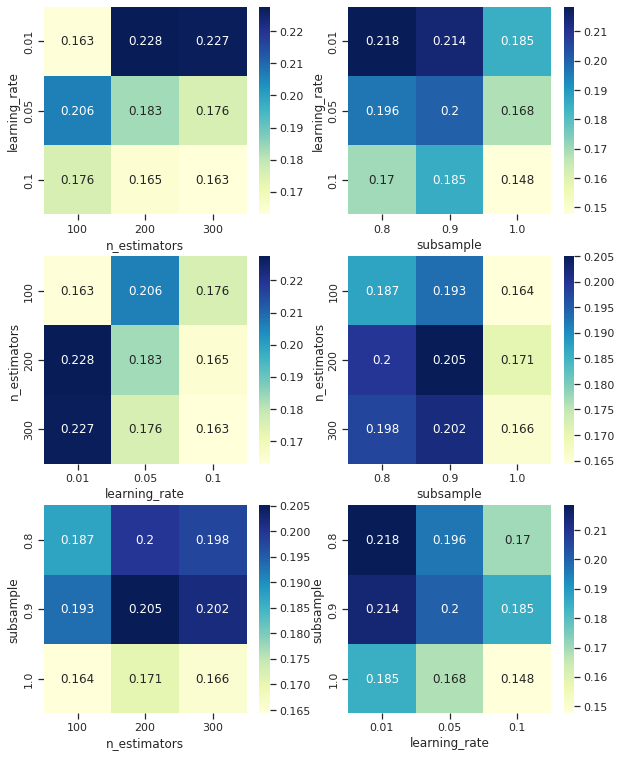

In [67]:
rows=3
cols=2
sns.set_palette("Set2")
fig, axs = plt.subplots(rows,cols,figsize = (10,13))

y_axis = 'learning_rate'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='n_estimators')
sns.heatmap(ax=axs[0,0], data = table, cmap='YlGnBu', annot=True, fmt='.3g')

table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='subsample')
sns.heatmap(ax=axs[0,1], data = table, cmap='YlGnBu', annot=True, fmt='.3g')

y_axis = 'n_estimators'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='learning_rate')
sns.heatmap(ax=axs[1,0], data = table, cmap='YlGnBu', annot=True, fmt='.3g')

table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='subsample')
sns.heatmap(ax=axs[1,1], data = table, cmap='YlGnBu', annot=True, fmt='.3g')

y_axis = 'subsample'
table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='n_estimators')
sns.heatmap(ax=axs[2,0], data = table, cmap='YlGnBu', annot=True, fmt='.3g')

table = pd.pivot_table(grid, values='squared_error', index=y_axis, columns='learning_rate')
sns.heatmap(ax=axs[2,1], data = table, cmap='YlGnBu', annot=True, fmt='.3g')

#### <span style='color:green'> **[done]** </span> Train model with chosen parameters:

In [68]:
xgboost_reg = set_xgboost_reg(X_columns=X, y_columns=y, data=df, n=g.loc[0,'n_estimators'], learning_rate=g.loc[0,'learning_rate'], subsample=g.loc[0,'subsample'], max_depth=len(X))
df = set_predictions(model=xgboost_reg, X_columns=X, y_columns=y, data=df)
df.tail(3)

,set,date,fighter,opponent,weight_class,result,method,outlier,lof_outlier,kd_dif,str_dif,td_dif,sub_dif,td_avg_dif,td_def_dif,sub_avg_dif,slpm_dif,str_acc_dif,sapm_dif,str_def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif,kd_dif_pred,str_dif_pred,td_dif_pred,sub_dif_pred
948,test,1997-05-30,Tito Ortiz,Guy Mezger,Lightweight,lose,SUB,False,False,-0.001066,0.183734,0.399174,-0.843823,1.173775,-1.185172,0.6,0.180204,1.164006,0.966781,-1.041286,0.116418,-2.453751,-1.479856,0.574988,0.066492,0.066492,0.066492,0.066492
949,validation,1997-02-07,Jerry Bohlander,Nick Sanzo,Lightweight,win,SUB,False,False,-0.001066,0.073252,0.399174,0.872349,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,1.680711,1.125253,-0.592359,1.102153,1.102153,1.102153,1.102153
950,test,1997-02-07,Rainy Martinez,Jerry Bohlander,Lightweight,lose,SUB,False,False,-0.001066,-0.000402,-0.385877,-0.843823,0.008097,-0.007234,0.0,-0.002234,0.008532,0.005583,0.001307,0.116418,-1.636761,-1.107697,0.574988,-0.247763,-0.247763,-0.247763,-0.247763


#### <span style='color:green'> **[done]** </span> Saving model as pickle:

In [69]:
save_trained_model(model=xgboost_reg,filename_path='../global_variables/stats_pred_' + set_lower_cases(weight) + '_xgboost_reg')

../global_variables/stats_pred_lightweight_xgboost_reg.pkl saved.


#### <span style='color:green'> **[done]** </span> Saving statistic prediction data:

In [70]:
df.to_csv('../data/model_stats_pred_' + set_lower_cases(weight) + '_data_trained.csv', index=None)
print('../data/model_stats_pred_' + set_lower_cases(weight) + '_data_trained.csv saved.')

../data/model_stats_pred_lightweight_data_trained.csv saved.
